## Pair Programming Limpieza IV


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

En este caso trabajaremos con el dataframe que limpiamos en el ejercicio de pair de Limpieza anterior, el de Limpieza III, donde limpiabamos algunas columnas y eliminabamos los outliers.


Hipótesis

La edad, el trabajo, el estado civil, la educación, la situación de deuda y la forma de contacto pueden influir en la probabilidad de que un cliente acepte la oferta.

El número de veces que se ha contactado a un cliente en el pasado (campo campaign), el número de días que han pasado desde el último contacto (campo pdays), y el resultado de la campaña anterior (campo poutcome) pueden afectar la respuesta del cliente a una nueva oferta.

Las variables económicas (tales como el índice de precios al consumidor (cons.price.idx), la tasa de variación del empleo (emp.var.rate), etc.) pueden influir en la probabilidad de que un cliente acepte la oferta.

Los clientes que ya tienen una hipoteca (housing) o un préstamo (loan) pueden ser menos propensos a aceptar una nueva oferta, ya que podrían estar limitados financieramente.

Es el momento de ponernos a trabajar con los valores nulos 💪🏽. A lo largo de este ejercicio de pair programming vamos a intentar eliminar los valores nulos de nuestras columnas. En la lección hemos aprendido varios métodos, nosotras os planteamos los ejercicios pero sentiros libres de usar el método que más se adapte a vuestras necesidades. Manos a la obra!

In [3]:
df = pd.read_csv("bank-additional-full.csv", index_col=0)

In [20]:
pd.options.display.max_columns = None

1. Lo primero que tenemos que evaluar es en que columnas tenemos nulos y que cantidad tenemos en cada una. 

> ¿Hay alguna columna con una gran cantidad de nulos? 

> En caso de que sea así deberemos eliminarla.

Con la librería sidetable presentamos de una vez todos los porcentajes de nulos 

In [21]:
import sidetable

In [22]:
df.stb.missing().T

,education,housing,loan,job,marital,age,"cons,price,idx",month,month_day_week,y,"nr,employed",euribor3m,"cons,conf,idx",previous,"emp,var,rate",poutcome,pdays,campaign,duration,contact,default,weekday
missing,1182.000000,763.000000,763.000000,178.000000,69.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total,32580.000000,32580.000000,32580.000000,32580.000000,32580.000000,32580.0,32580.0,32580.0,32580.0,32580.0,32580.0,32580.0,32580.0,32580.0,32580.0,32580.0,32580.0,32580.0,32580.0,32580.0,32580.0,32580.0
percent,3.627993,2.341928,2.341928,0.546347,0.211786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
nulos = pd.DataFrame((df.isnull().sum() * 100) / df.shape[0]).reset_index()

In [ ]:
Solo el %

In [9]:
nulos

,index,0
0,age,0.000000
1,job,0.801438
2,marital,0.194288
3,education,4.201477
4,default,20.876239
5,housing,2.404313
6,loan,2.404313
7,contact,0.000000
8,duration,0.000000
9,campaign,0.000000


Vemos que con missing recibimos más información sobre nulos y porcentajes y ordena los resultados de mayor a menor

In [24]:
df.describe(include= 'object')

,job,marital,education,default,housing,loan,contact,poutcome,y,month_day_week,month,weekday
count,32402,32511,31398,32580,31817,31817,32580,32580,32580,32580,32580,32580
unique,11,3,7,2,2,2,2,3,2,50,10,5
top,administration,married,university degree,Si,No,Si,cellular,NONEXISTENT,no,"['may', 'fri']",'may','thu'
freq,9126,18652,10714,32577,17207,26841,21772,27530,28384,2173,10362,6851


In [25]:
df['default'].unique()

array(['Si', 'No'], dtype=object)

In [27]:
df.dropna(subset = ['default'], how = 'any', inplace= True)

In [29]:
df.sample(15)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week,month,weekday
31239,35,technician,married,professional course,Si,Si,Si,cellular,66,2,999,0,NONEXISTENT,-1.8,92.893,-46.2,1.334,5099.1,no,"['may', 'wed']",'may','wed'
34220,32,management,married,university degree,Si,No,No,cellular,36,2,999,0,FAILURE,-1.8,92.893,-46.2,1.281,5099.1,no,"['may', 'wed']",'may','wed'
5435,39,technician,single,professional course,Si,Si,Si,telephone,180,5,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,yes,"['may', 'fri']",'may','fri'
38058,36,administration,single,university degree,Si,No,Si,cellular,100,2,999,0,NONEXISTENT,-3.4,92.379,-29.8,0.773,5017.5,yes,"['sep', 'fri']",'sep','fri'
11536,45,management,married,university degree,Si,Si,Si,telephone,126,5,999,0,NONEXISTENT,1.4,94.465,-41.8,4.959,5228.1,no,"['jun', 'fri']",'jun','fri'
36167,26,self-employed,single,university degree,Si,Si,Si,cellular,161,1,999,0,SUCCESS,-1.8,92.893,-46.2,1.270,5099.1,no,"['may', 'wed']",'may','wed'
11877,45,NaN,married,NaN,Si,Si,Si,telephone,61,4,999,0,NONEXISTENT,1.4,94.465,-41.8,4.959,5228.1,no,"['jun', 'fri']",'jun','fri'
24107,46,blue-collar,married,professional course,Si,No,Si,telephone,238,1,999,0,NONEXISTENT,-0.1,93.200,-42.0,4.286,5195.8,no,"['nov', 'wed']",'nov','wed'
39533,44,management,married,NaN,Si,Si,Si,telephone,473,2,999,0,FAILURE,-1.8,93.749,-34.6,0.646,5008.7,yes,"['apr', 'tue']",'apr','tue'
31131,39,blue-collar,married,professional course,Si,No,Si,cellular,72,1,999,0,NONEXISTENT,-1.8,92.893,-46.2,1.334,5099.1,no,"['may', 'wed']",'may','wed'


In [30]:
df['default'].unique()

array(['Si', 'No'], dtype=object)

Hemos comprobado que se han eliminado los nulos correctamente

2. Es el momento de eliminar los nulos:
> Reemplazad los valores nulos de la columna age por la media de la edad, redondeada a dos decimales.


In [31]:
df_numericas = df.select_dtypes(include=np.number)

In [32]:
df_numericas.head(2)

,age,duration,campaign,pdays,previous,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed"
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0


Hacemos un displot para ver la distribución de la columna, bastante normal con tendencia positiva, ya que la cola de la derecha es más alargada

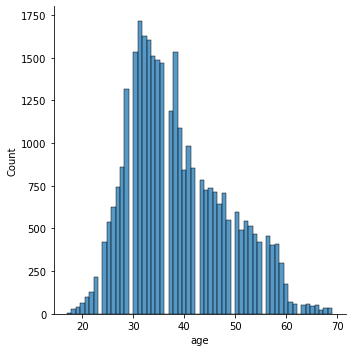

In [34]:
sns.displot(df['age'])


In [35]:
df['age'].fillna(df['age'].median, inplace= True)

In [36]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week,month,weekday
0,56,housemaid,married,basic 4y,Si,Si,Si,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",'may','mon'
2,37,services,married,high school,Si,No,Si,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",'may','mon'
3,40,administration,married,basic 6y,Si,Si,Si,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",'may','mon'
4,56,services,married,high school,Si,Si,No,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",'may','mon'
6,59,administration,married,professional course,Si,Si,Si,telephone,139,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",'may','mon'
8,24,technician,single,professional course,Si,No,Si,telephone,380,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",'may','mon'
9,25,services,single,high school,Si,No,Si,telephone,50,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",'may','mon'
11,25,services,single,high school,Si,No,Si,telephone,222,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",'may','mon'
12,29,blue-collar,single,high school,Si,Si,No,telephone,137,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",'may','mon'
13,57,housemaid,divorced,basic 4y,Si,No,Si,telephone,293,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",'may','mon'


In [38]:
df.isnull().sum()

age                  0
job                178
marital             69
education         1182
default              0
housing            763
loan               763
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp,var,rate         0
cons,price,idx       0
cons,conf,idx        0
euribor3m            0
nr,employed          0
y                    0
month_day_week       0
month                0
weekday              0
dtype: int64


> Reemplazad los valores nulos de la columna duration por la mediana de la edad, redondeada a dos decimales.


In [40]:
df.age.median()

37.0

In [41]:
df[df["columna"] == "categories" ]

KeyError: 'columna'

> En relación a las columnas de education, default, housing y loan al tratarse de columnas de tipo categórica, reemplazad los valores nulos por una nueva categória que se llame unknown.


In [ ]:
nulos[(nulos["columna"] == "developer") | (nulos["columna"] == "publisher")]

> Reemplazad los valores nulos de las columna job y marital por el valor más frecuente (la moda).